In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as stats

In [2]:
df = pd.read_csv('/home/san/Documentos/santiago/simulacion/wine_dataset.csv', sep=',',quotechar=' ',dtype={'WineType':'category'})

In [3]:
df.head(4)

Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  Total phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   

   Flavanoids  Nonflavanoid phenols  Proanthocyanins  Color intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   

   OD280/OD315 of diluted wines  Proline WineType  
0                          3.92   1065.0      One  
1                          3.40   1050.0      One  
2                          3.17   1185.0      One  
3                          3.45   1480.0      One

In [4]:
# Obtener la fecuencia absoluta como una serie de datos
x = df['WineType'].value_counts().to_frame()

In [5]:
total = x['WineType'].sum()

In [6]:
def freq_relative(x):
    return x/total

In [7]:
def angulo(x):
    return freq_relative(x)*360

1. Frecuencia Absoluta, Relativa y Angulo

In [8]:
x = x.assign(freq_relative=freq_relative(x['WineType']))
x = x.assign(angulo=angulo(x['WineType']))
x = x.assign(freq_absoluta=df['WineType'].value_counts())


In [9]:
x

WineType  freq_relative      angulo  freq_absoluta
Two          71       0.398876  143.595506             71
One          59       0.331461  119.325843             59
Three        48       0.269663   97.078652             48

2. Plot lineal de las Frecuencias

In [10]:
total_freq_absoluta=x['freq_absoluta'].sum()
total_freq_relativa=x['freq_relative'].sum()

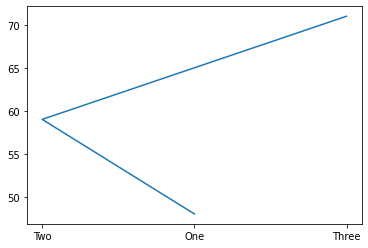

In [11]:
#ax=sns.barplot(x="WineType",y="freq_absoluta",data=x)
plt.plot(x['freq_absoluta'])

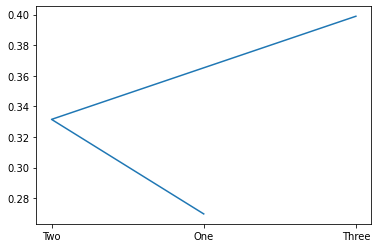

In [12]:
#ax=sns.barplot(x="WineType",y="freq_relative",data=x)
plt.plot(x['freq_relative'])

3. Caja de Bigotes de cantidad de Alcohol

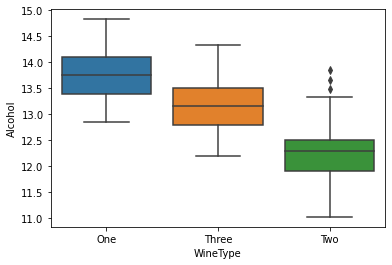

In [13]:
ax = sns.boxplot(x="WineType", y="Alcohol", data=df)

Media y Desviacion Estandar de Alcohol

In [14]:
#media
print(stats.mean(df['Alcohol']))

13.00061797752809


In [15]:
#desviacion estandar
print(stats.stdev(df['Alcohol']))

0.8118265380058575


Media y Desviacion Estandar de Alcalinidad

In [16]:
#media
print(stats.mean(df['Alcalinity of ash']))

19.49494382022472


In [17]:
#desviacion estandar
print(stats.stdev(df['Alcalinity of ash']))

3.339563767173505


4. Relacion de Alcohol e Intensidad de Color

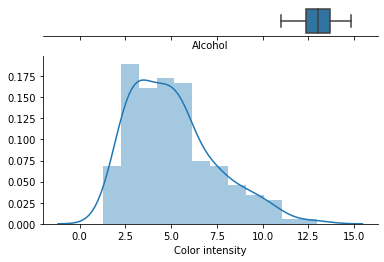

In [18]:
f, (ax_box,ax_hist) = plt.subplots(2, sharex=True,
                                  gridspec_kw={"height_ratios":(.15, .85)})
sns.boxplot(df['Alcohol'], ax=ax_box)
sns.distplot(df['Color intensity'], ax=ax_hist)

ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)